### 调包与方程基本参数

In [12]:
import numpy as np        
from matplotlib import pyplot as plt


In [13]:
# Eqn: u_t + c u_x = 0 in [0, 2] assuming c > 0
# u(0, t) = 1, u(x, 0) = 2 in [0.5, 1] otherwise 1

nx = 2001             # nx is num of space intervals
dx = 2 / (nx - 1)   # dx is space interval
T = 0.6             # T is total time, T < 1 to ensure u(1, t) = 1, otherwise LW explodes
c = 1.2             # wavespeed c > 0

In [14]:
u = np.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2 

### 一阶迎风格式

In [15]:
# stable iff c * dt / dx <= 1

nu = 0.8 # nu is CFL number c * dt / dx
dt = nu * dx / c

u0 = u.copy() # initialize result
t = 0

while t + dt < T:
    t += dt
    u0[1:] = u0[1:] - nu * (u0[1:] - u0[:-1])
dt = T - t
nu = c * dt / dx
u0[1:] = u0[1:] - nu * (u0[1:] - u0[:-1])

### Lax-Wendroff

In [16]:
# stable iff c * dt / dx <= 1

nu = 0.8 # nu is CFL number c * dt / dx
dt = nu * dx / c

u1 = u.copy() # initialize result
t = 0

while t + dt < T:
    t += dt
    u1[1:-1] = u1[1:-1] - nu * (u1[2:] - u1[:-2]) / 2 + nu * nu / 2 * (u1[2:] + u1[:-2]- 2 * u1[1:-1])
dt = T - t
nu = c * dt / dx
u1[1:-1] = u1[1:-1] - nu * (u1[2:] - u1[:-2]) / 2 + nu * nu / 2 * (u1[2:] + u1[:-2]- 2 * u1[1:-1])

### 二阶迎风(Beam-Warming)格式

In [17]:
# stable iff c * dt / dx <= 2

nu = 1.2 # nu is CFL number c * dt / dx
dt = nu * dx / c

u2 = u.copy() # initialize result
t = 0

while t + dt < T:
    t += dt
    u2[2:] = u2[2:] - nu * (3 * u2[2:] + u2[:-2] - 4 * u2[1:-1]) / 2 + nu * nu * (u2[2:] + u2[:-2] - 2 * u2[1:-1]) / 2
dt = T - t
nu = c * dt / dx
u2[2:] = u2[2:] - nu * (3 * u2[2:] + u2[:-2] - 4 * u2[1:-1]) / 2 + nu * nu * (u2[2:] + u2[:-2] - 2 * u2[1:-1]) / 2

### 隐式Z字形格式

In [18]:
# always stable

nu = 0.95 # nu is CFL number c * dt / dx
dt = nu * dx / c

u3 = u.copy() # initialize result
u3_new = u.copy()
t = 0

while t + dt < T:
    t += dt
    for i in range(1, nx):
        u3_new[i] = u3[i-1] + (1 - nu) / (1 + nu) * (u3_new[i-1] - u3[i])
    u3 = u3_new.copy()
dt = T - t
nu = c * dt / dx
for i in range(1, nx):
    u3_new[i] = u3[i-1] + (1 - nu) / (1 + nu) * (u3_new[i-1] - u3[i])
u3 = u3_new.copy()

### 结果展示

In [19]:
def L2_error(v1, v2):
    return np.mean((v1 - v2) ** 2)

def Li_error(v1, v2):
    return np.max(np.abs(v1 - v2))

U   log L2 error: -5.878  log Li error: -0.720
LW  log L2 error: -6.455  log Li error: -0.487
BW  log L2 error: -6.571  log Li error: -0.487
Z   log L2 error: -2.552  log Li error: 0.249


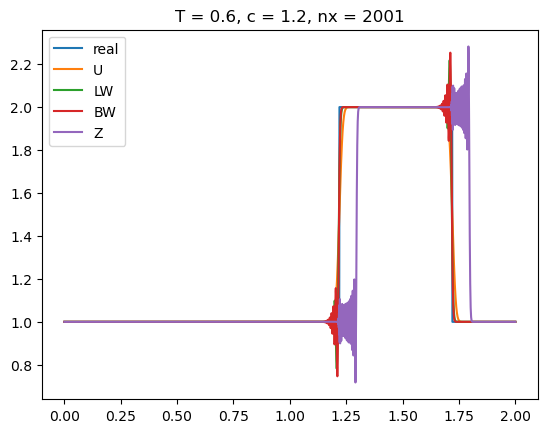

In [20]:
# u_real is real result
u_real = np.ones(nx)
u_real[int((.5 + T * c) / dx):min(int((1 + T * c) / dx + 1), nx)] = 2

plt.title("T = {}, c = {}, nx = {}".format(T, c, nx))
plt.plot(np.linspace(0, 2, nx), u_real, label="real")
plt.plot(np.linspace(0, 2, nx), u0, label="U")
plt.plot(np.linspace(0, 2, nx), u1, label="LW")
plt.plot(np.linspace(0, 2, nx), u2, label="BW")
plt.plot(np.linspace(0, 2, nx), u3, label="Z")
plt.legend()

print("U   log L2 error: {:.3f}  log Li error: {:.3f}".format(np.log(L2_error(u0, u_real)), np.log(Li_error(u0, u_real))))
print("LW  log L2 error: {:.3f}  log Li error: {:.3f}".format(np.log(L2_error(u1, u_real)), np.log(Li_error(u1, u_real))))
print("BW  log L2 error: {:.3f}  log Li error: {:.3f}".format(np.log(L2_error(u2, u_real)), np.log(Li_error(u2, u_real))))
print("Z   log L2 error: {:.3f}  log Li error: {:.3f}".format(np.log(L2_error(u3, u_real)), np.log(Li_error(u3, u_real))))

# print(nx - 1, end='&')
# print("{:.3f}".format(np.log(L2_error(u0, u_real))/np.log(2)), end='&')
# print("{:.3f}".format(np.log(Li_error(u0, u_real))/np.log(2)), end='&')
# print("{:.3f}".format(np.log(L2_error(u1, u_real))/np.log(2)), end='&')
# print("{:.3f}".format(np.log(Li_error(u1, u_real))/np.log(2)), end='&')
# print("{:.3f}".format(np.log(L2_error(u2, u_real))/np.log(2)), end='&')
# print("{:.3f}".format(np.log(Li_error(u2, u_real))/np.log(2)), end='&')
# print("{:.3f}".format(np.log(L2_error(u3, u_real))/np.log(2)), end='&')
# print("{:.3f}".format(np.log(Li_error(u3, u_real))/np.log(2)), end='\\\\')

